In [57]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

# encoding
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

In [58]:
data = pd.ExcelFile('18.24.xlsx')
traffic = data.parse('107年A2',header = 0)
traffic.head()

,總編號(案件編號),發生日期,月份,發生時間,時段,GPS經度,GPS緯度,地址類型名稱,發生市區鄉鎮名稱,發生地址_村里名稱,...,駕駛資格情形代碼,駕駛執照種類大類別代碼,駕駛執照種類子類別代碼,飲酒情形代碼,車輛撞擊部位大類別代碼 – 最初,車輛撞擊部位子類別代碼 – 最初,肇因研判大類別代碼 - 個別,肇因研判子類別代碼 - 個別,肇事逃逸類別代碼(是否肇逃),職業代碼
0,10701BS191B0001,20180101,1月,2600,00-02,121.612920,23.970781,交叉路口,花蓮市,,...,非(汽)機車駕駛人,5,20,非(汽)機車駕駛人,3,16,9,尚未發現肇事因素,1,21
1,10701BS191B0015,20180101,1月,141900,14-16,121.600195,23.988765,交叉路口,花蓮市,,...,非(汽)機車駕駛人,5,20,非(汽)機車駕駛人,3,16,9,尚未發現肇事因素,1,21
2,10701BS191B0016,20180101,1月,175700,16-18,121.600151,23.986762,路段,花蓮市,,...,有適當之駕照,3,10,未飲酒,2,11,1,未注意車前狀態,1,18
3,10701BS191B0022,20180102,1月,75000,04-06,121.611195,23.991073,路段,花蓮市,,...,有適當之駕照,3,10,未飲酒,3,15,1,未依規定讓車,1,21
4,10701BS191B0028,20180102,1月,190900,18-20,121.603068,23.974405,交叉路口,花蓮市,,...,非(汽)機車駕駛人,5,20,非(汽)機車駕駛人,3,15,9,尚未發現肇事因素,1,18


In [59]:
## 花蓮分局
fig_df = traffic[traffic['各分局'] == '花蓮分局'].groupby(['月份','時段']).size().unstack()

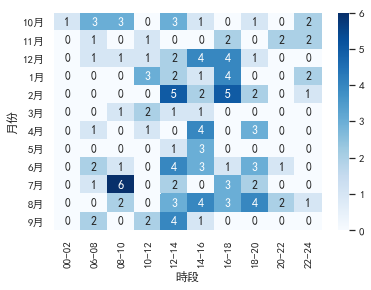

In [62]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

sns.heatmap(fig_df,cmap='Blues',annot=True)

In [60]:
traffic[traffic['各分局'] == '花蓮分局'].groupby(['月份','時段']).size().unstack().fillna(0)

時段,00-02,02-04,04-06,06-08,08-10,10-12,12-14,14-16,16-18,18-20,20-22,22-24
月份,,,,,,,,,,,,
10月,4.0,1.0,0.0,8.0,8.0,16.0,21.0,14.0,12.0,9.0,8.0,4.0
11月,0.0,0.0,0.0,5.0,7.0,5.0,18.0,8.0,16.0,13.0,17.0,11.0
12月,6.0,3.0,1.0,5.0,10.0,18.0,12.0,7.0,20.0,20.0,6.0,4.0
1月,2.0,0.0,1.0,9.0,5.0,9.0,12.0,9.0,20.0,23.0,6.0,7.0
2月,1.0,3.0,2.0,1.0,7.0,12.0,9.0,5.0,15.0,11.0,10.0,5.0
3月,0.0,0.0,1.0,6.0,1.0,5.0,8.0,7.0,17.0,19.0,20.0,3.0
4月,6.0,1.0,1.0,5.0,11.0,6.0,6.0,11.0,15.0,14.0,7.0,3.0
5月,0.0,0.0,3.0,3.0,5.0,9.0,9.0,10.0,23.0,17.0,13.0,4.0
6月,1.0,0.0,3.0,9.0,16.0,13.0,19.0,17.0,17.0,20.0,5.0,1.0


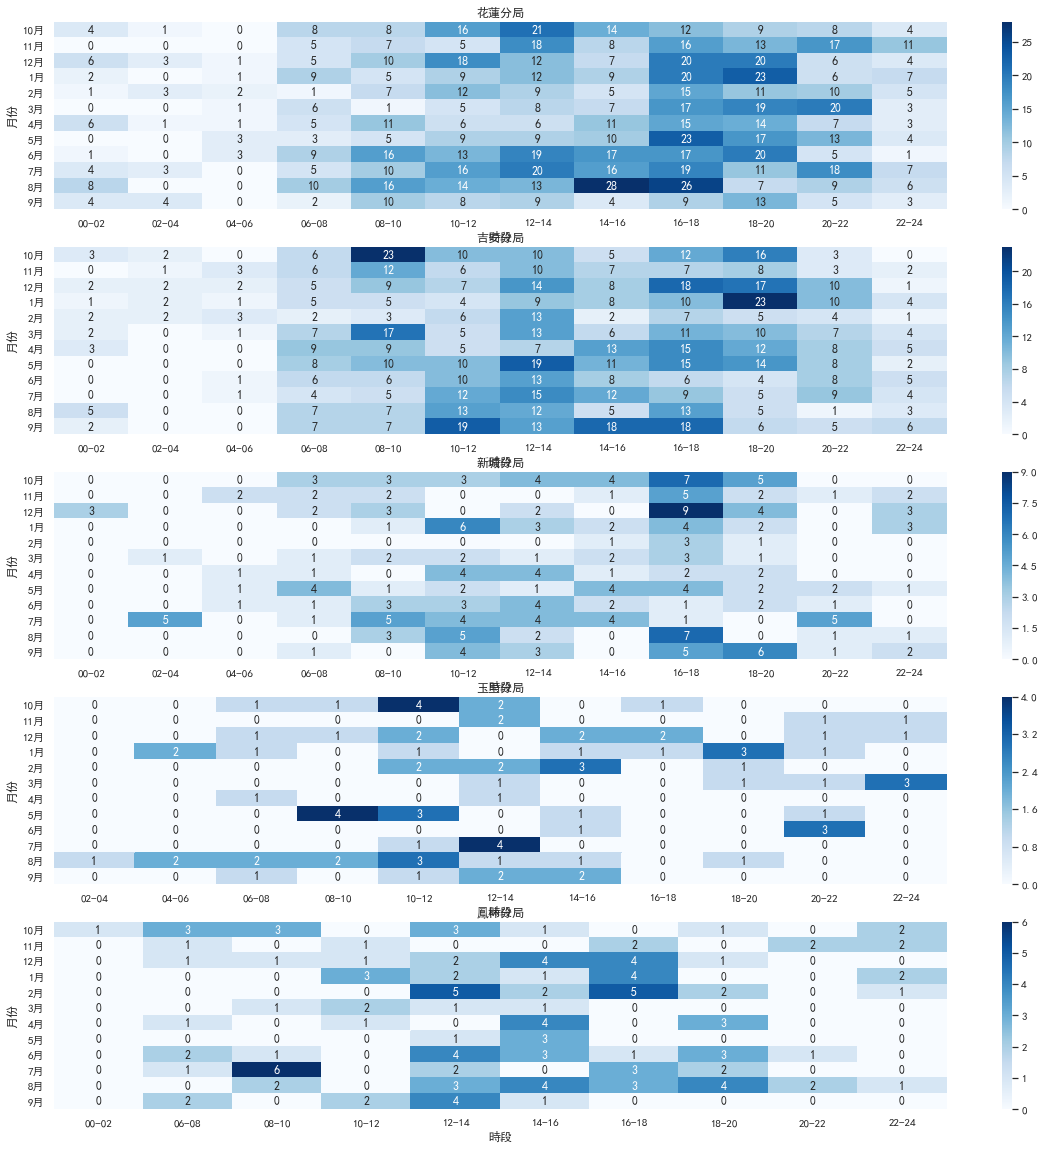

In [61]:
a4_dims = (20, 20)
fig, (axis1,axis2,axis3,axis4,axis5) = plt.subplots(5,1,sharey =True,figsize=a4_dims)

a = [axis1,axis2,axis3,axis4,axis5]
k = 0

for i in traffic['各分局'].drop_duplicates().values:
    fig_df = traffic[traffic['各分局'] == i].groupby(['月份','時段']).size().unstack().fillna(0)
    sns.heatmap(fig_df,cmap='Blues',annot=True,ax = a[k]).set_title(i)
    k+=1

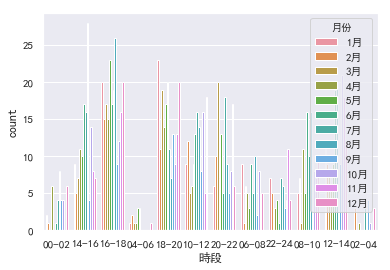

In [66]:
sns.countplot('時段',data = traffic[traffic['各分局'] == '花蓮分局'],hue = '月份')

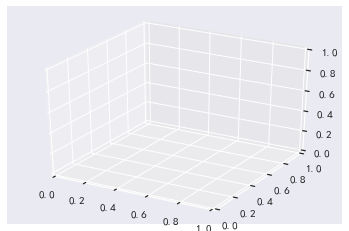

In [72]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')